In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv')
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [0]:
df.shape

(344, 56)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 56 columns):
vano                          344 non-null int64
mes                           344 non-null int64
hom_doloso                    344 non-null int64
lesao_corp_morte              248 non-null float64
latrocinio                    344 non-null int64
hom_por_interv_policial       260 non-null float64
tentat_hom                    344 non-null int64
lesao_corp_dolosa             344 non-null int64
estupro                       200 non-null float64
hom_culposo                   260 non-null float64
lesao_corp_culposa            248 non-null float64
roubo_comercio                344 non-null int64
roubo_residencia              344 non-null int64
roubo_veiculo                 344 non-null int64
roubo_carga                   344 non-null int64
roubo_transeunte              344 non-null int64
roubo_em_coletivo             344 non-null int64
roubo_banco                   344 non-null int64
rou

In [0]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

In [0]:
df.describe().round(1)

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.0,344.0,344.0,248.0,344.0,260.0,344.0,344.0,200.0,260.0,248.0,344.0,344.0,344.0,344.0,344.0,344.0,344.0,200.0,236.0,200.0,200.0,68.0,344.0,344.0,344.0,344.0,200.0,200.0,68.0,344.0,344.0,248.0,200.0,200.0,200.0,344.0,164.0,164.0,164.0,344.0,164.0,164.0,164.0,164.0,248.0,212.0,344.0,212.0,200.0,200.0,344.0,344.0,344.0,248.0,344.0
mean,2004.8,6.5,504.6,4.3,15.7,71.9,318.3,5492.8,369.9,212.1,3410.8,455.0,133.3,2448.7,340.3,3418.5,659.0,9.4,3.6,958.0,11.3,145.7,10.8,1211.2,9428.1,1674.7,1518.9,650.2,1449.2,124.8,5994.3,10433.2,0.7,133.3,7.8,2231.9,1071.9,609.2,759.1,186.1,1772.2,2319.6,568.6,1255.5,83.0,5530.3,435.1,66.3,3.3,2.1,0.3,577.7,4734.7,2448.7,53794.2,3.0
std,8.3,3.4,113.8,2.8,5.9,36.5,127.6,1514.2,94.4,54.2,776.2,119.8,44.3,789.7,223.9,2459.0,297.6,10.6,2.6,624.3,6.4,55.4,7.8,800.6,4578.0,294.9,971.9,268.8,368.6,80.2,1964.8,3696.7,1.0,43.3,5.1,772.1,643.4,246.3,312.9,36.2,656.8,650.5,248.0,357.0,63.0,1100.8,65.4,34.5,2.2,1.8,0.6,105.0,3204.1,789.7,11039.1,0.1
min,1991.0,1.0,272.0,0.0,2.0,10.0,122.0,2350.0,188.0,111.0,848.0,243.0,49.0,1097.0,59.0,688.0,281.0,0.0,0.0,0.0,1.0,11.0,0.0,81.0,3261.0,1159.0,322.0,23.0,484.0,0.0,2322.0,4691.0,0.0,23.0,0.0,717.0,80.0,248.0,262.0,114.0,729.0,1173.0,225.0,628.0,21.0,1409.0,236.0,0.0,0.0,0.0,0.0,334.0,1086.0,1097.0,30621.0,2.0
25%,1998.0,3.0,413.8,2.0,11.0,41.8,200.0,4067.0,282.0,176.0,3040.0,365.8,103.8,1889.8,208.2,1053.0,430.8,2.0,2.0,549.8,6.0,106.0,2.2,811.8,5107.8,1430.5,732.0,501.0,1297.0,3.8,3978.0,6700.2,0.0,109.8,4.8,1654.5,714.5,360.5,426.0,160.0,1276.8,1681.0,332.5,950.5,46.0,4868.5,390.0,42.0,2.0,1.0,0.0,500.0,1557.0,1889.8,45374.5,3.0
50%,2005.0,6.0,507.0,4.0,15.0,70.0,318.5,5830.5,384.0,203.0,3372.0,433.5,125.0,2322.0,285.5,2788.5,592.0,4.5,3.0,717.5,10.0,149.5,13.0,1154.0,9243.5,1637.5,1076.5,717.5,1492.5,158.0,6559.0,10448.5,0.0,132.5,7.0,2170.5,979.5,623.0,815.0,184.0,1755.0,2424.0,530.0,1259.0,58.0,5455.0,427.0,60.5,3.0,2.0,0.0,590.0,4190.0,2322.0,54926.5,3.0
75%,2012.0,9.0,577.2,6.0,19.0,96.2,398.2,6582.5,441.2,236.2,3733.5,536.2,151.2,2778.0,401.2,5385.2,784.0,14.0,5.0,1306.8,15.0,180.5,17.0,1635.0,11590.5,1833.2,2334.2,860.0,1731.2,181.5,7601.5,13877.5,1.0,152.2,11.0,2880.5,1546.0,763.5,1045.2,208.0,2202.0,2905.5,793.5,1515.2,93.0,6261.8,481.5,87.0,4.0,3.0,1.0,649.0,6872.8,2778.0,63292.5,3.0
max,2019.0,12.0,831.0,21.0,36.0,194.0,645.0,9050.0,561.0,449.0,6653.0,914.0,300.0,5358.0,1329.0,9669.0,1628.0,54.0,12.0,2626.0,37.0,283.0,26.0,3661.0,23203.0,2630.0,5368.0,1036.0,2215.0,243.0,9880.0,18003.0,5.0,271.0,31.0,3627.0,2543.0,1160.0,1282.0,289.0,3695.0,3425.0,1114.0,2314.0,350.0,9034.0,628.0,217.0,13.0,10.0,3.0,848.0,13833.0,5358.0,75403.0,3.0


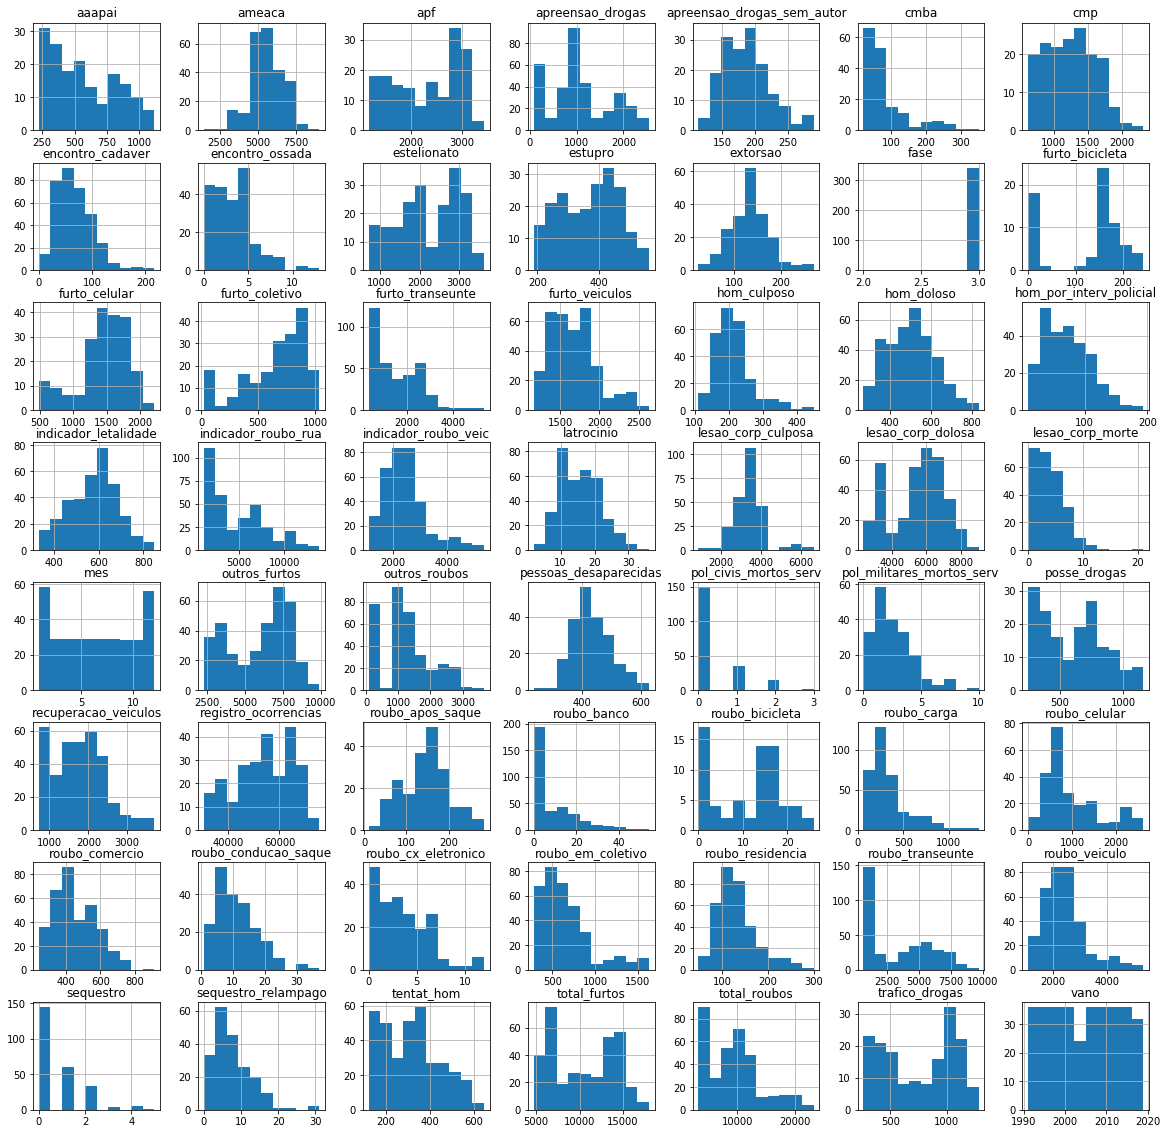

In [0]:
df.hist(figsize = (20,20));

In [0]:
print(df.roubo_veiculo.mean())
print(df.furto_veiculos.mean())
print(df.recuperacao_veiculos.mean())

2448.6976744186045
1674.671511627907
1772.2383720930231


In [0]:
df.recuperacao_veiculos.sum()/(df.roubo_veiculo.sum() + df.furto_veiculos.sum())

0.42980346705075084

In [0]:
print(df.hom_doloso.max())
print(df.hom_doloso.min())

831
272


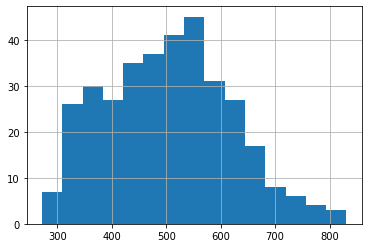

In [0]:
df.hom_doloso.hist(bins = 15);

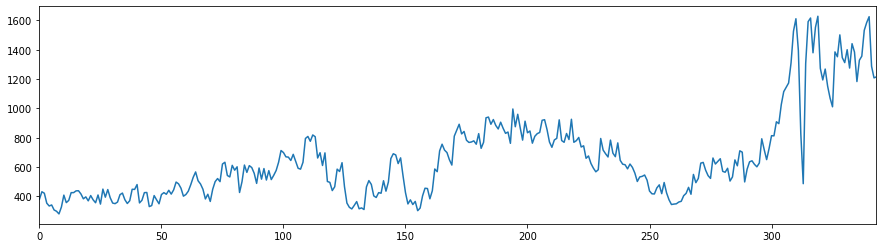

In [0]:
fig, ax = plt.subplots(figsize = (15,4))

ax = df['roubo_em_coletivo'].plot()

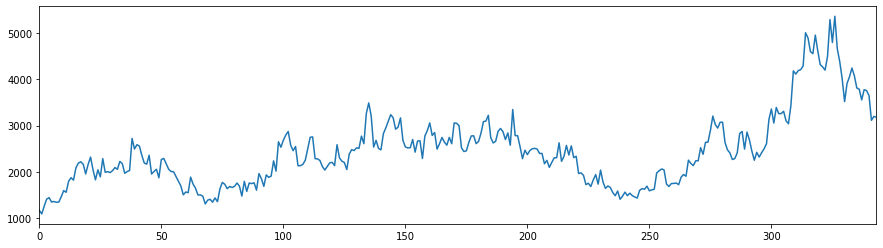

In [0]:
fig, ax = plt.subplots(figsize = (15,4))

ax = df['roubo_veiculo'].plot()

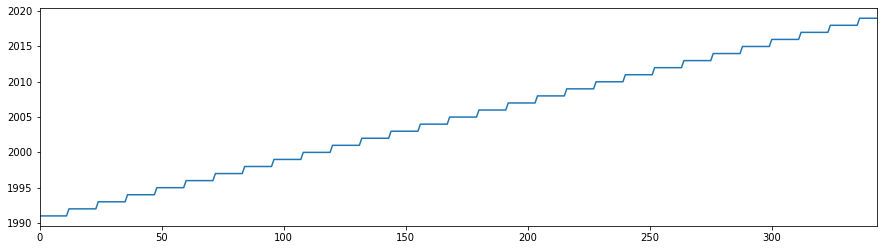

In [0]:
fig, ax = plt.subplots(figsize = (15,4))

ax = df['vano'].plot()

In [0]:
df_ano = df.copy()
df_ano = df_ano.drop(['mes'], axis =1)
df_ano = df_ano.groupby(['vano']).sum()
df_ano

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991,7518,0.0,205,0.0,2250,39053,0.0,0.0,0.0,5806,2441,16452,1021,11090,4249,347,0.0,0.0,0.0,0.0,0.0,1378,42784,23979,10944,0.0,0.0,0.0,42288,77211,0.0,0.0,0.0,0.0,1866,0.0,0.0,0.0,9890,0.0,0.0,0.0,0.0,0.0,0.0,1459,0.0,0.0,0.0,7723,15339,16452,0.0,36
1992,7635,0.0,288,0.0,1910,38489,0.0,0.0,0.0,5466,3080,24502,1936,10814,4810,227,0.0,0.0,0.0,0.0,0.0,1337,52172,27619,10402,0.0,0.0,0.0,44625,82646,0.0,0.0,0.0,0.0,2043,0.0,0.0,0.0,11246,0.0,0.0,0.0,0.0,0.0,0.0,849,0.0,0.0,0.0,7923,15624,24502,0.0,36
1993,7720,0.0,265,0.0,1741,37633,0.0,0.0,0.0,3639,2605,24790,1701,9780,4722,225,0.0,0.0,0.0,0.0,0.0,1487,48949,26897,7488,0.0,0.0,0.0,42283,76668,0.0,0.0,0.0,0.0,1749,0.0,0.0,0.0,11619,0.0,0.0,0.0,0.0,0.0,0.0,792,0.0,0.0,0.0,7985,14502,24790,0.0,36
1994,8408,0.0,223,0.0,1766,35697,0.0,0.0,0.0,4403,2273,27470,1386,11653,4759,310,0.0,0.0,0.0,0.0,0.0,1704,53958,26231,6917,0.0,0.0,0.0,36343,69491,0.0,0.0,0.0,0.0,1830,0.0,0.0,0.0,16030,0.0,0.0,0.0,0.0,0.0,0.0,913,0.0,0.0,0.0,8631,16412,27470,0.0,36
1995,8438,0.0,200,0.0,1944,38469,0.0,0.0,0.0,3886,1625,23676,1198,11381,5126,440,0.0,0.0,0.0,0.0,0.0,1939,49271,21928,6414,0.0,0.0,0.0,31644,59986,0.0,0.0,0.0,0.0,3508,0.0,0.0,0.0,17622,0.0,0.0,0.0,0.0,0.0,0.0,1133,0.0,0.0,0.0,8638,16507,23676,0.0,36
1996,7259,0.0,166,0.0,2018,41180,0.0,0.0,0.0,3610,1120,18367,3003,12311,5480,288,0.0,0.0,0.0,0.0,0.0,2328,46507,20126,9784,0.0,0.0,0.0,31168,61078,0.0,0.0,0.0,0.0,6731,0.0,0.0,0.0,11151,0.0,0.0,0.0,0.0,0.0,0.0,1077,0.0,0.0,0.0,7425,17791,18367,0.0,36
1997,6923,0.0,117,0.0,2355,44273,0.0,0.0,0.0,3879,1000,19576,3063,13512,6574,156,0.0,0.0,0.0,0.0,0.0,7731,55491,21834,9629,0.0,0.0,0.0,40334,71797,0.0,0.0,0.0,0.0,6388,0.0,0.0,0.0,10630,0.0,0.0,0.0,0.0,0.0,0.0,414,0.0,0.0,0.0,7040,20086,19576,0.0,36
1998,5726,0.0,129,355.0,2418,55794,0.0,4108.0,0.0,3964,896,21519,2505,10558,6737,140,0.0,0.0,0.0,0.0,0.0,16049,62368,21309,5687,0.0,0.0,0.0,49391,76387,0.0,0.0,0.0,0.0,13377,0.0,0.0,0.0,12161,0.0,0.0,0.0,0.0,0.0,0.0,462,0.0,0.0,0.0,6210,17295,21519,0.0,36
1999,5888,105.0,146,289.0,2493,62021,0.0,3973.0,38571.0,5063,1321,29666,1071,12893,7653,129,0.0,0.0,0.0,0.0,0.0,18727,76523,20523,5389,0.0,0.0,0.0,54095,80007,0.0,0.0,0.0,0.0,8904,0.0,0.0,0.0,15811,0.0,0.0,0.0,0.0,38338.0,0.0,1001,0.0,0.0,0.0,6428,20546,29666,396839.0,36


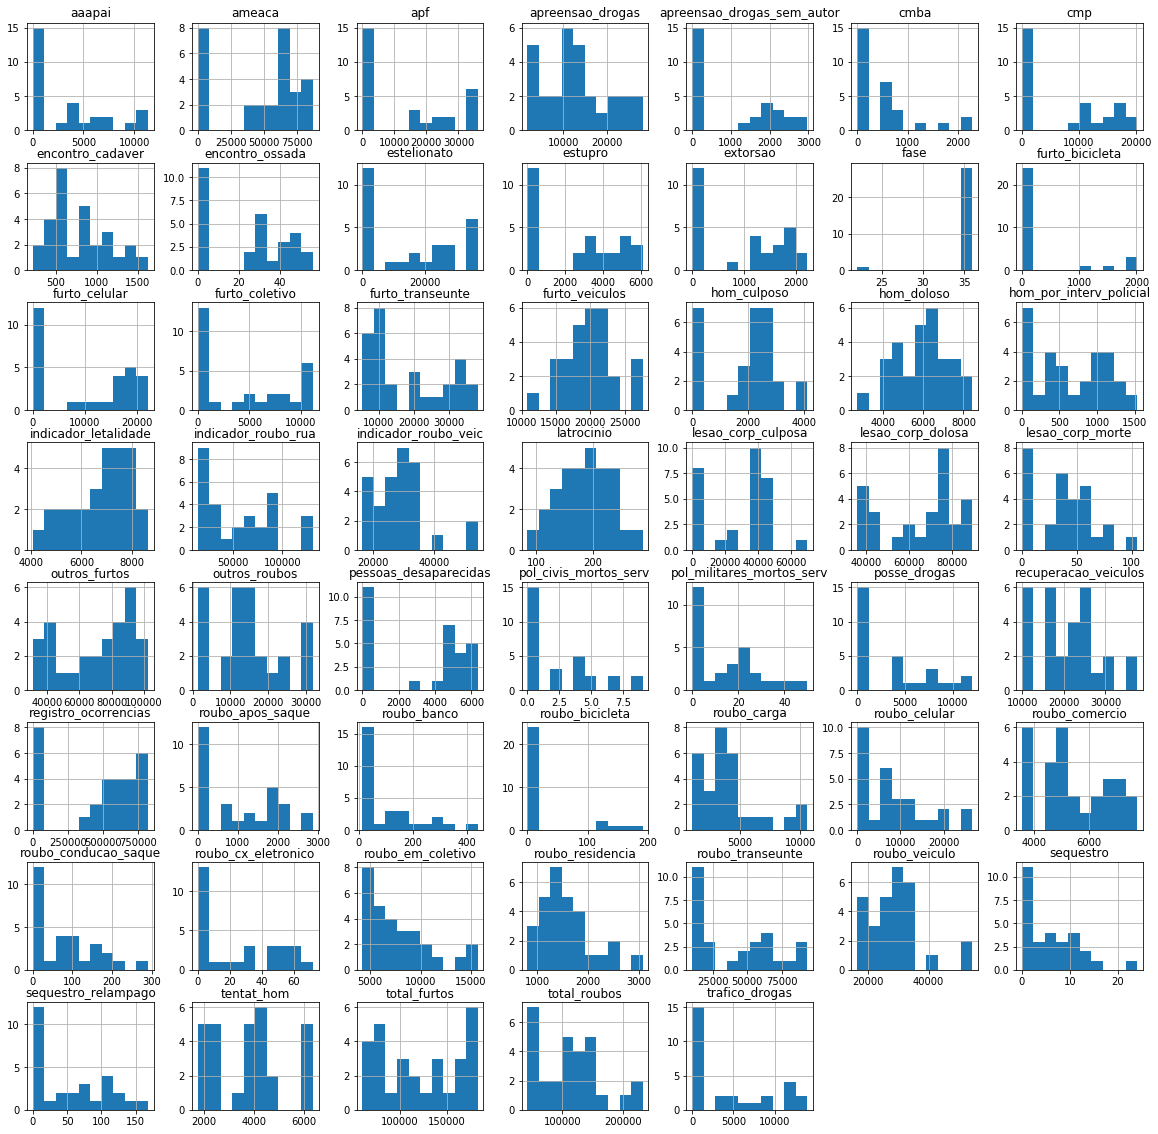

In [0]:
df_ano.hist(figsize = (20,20));

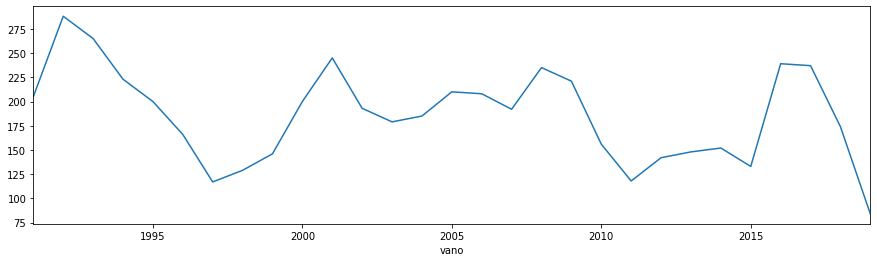

In [0]:
fig, ax = plt.subplots(figsize = (15,4))

ax = df_ano['latrocinio'].plot()

In [0]:
print(df_ano['latrocinio'].max())
print(df_ano.loc[2016, 'latrocinio'])
print(df_ano['latrocinio'].max()/df_ano.loc[2016, 'latrocinio'])

288
239
1.205020920502092


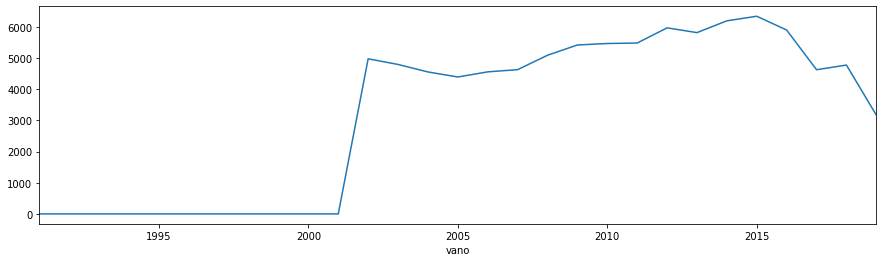

In [0]:
fig, ax = plt.subplots(figsize = (15,4))

ax = df_ano['pessoas_desaparecidas'].plot()

In [0]:
df_taxa_retorno = list()
ano = list()
for i in range (2000, 2019):
  taxa = (df_ano.loc[i, 'recuperacao_veiculos']/(df_ano.loc[i,'roubo_veiculo'] + df_ano.loc[i,'furto_veiculos'])*100).round(2)
  ano.append(i)
  df_taxa_retorno.append(taxa)
  print(taxa)

48.18
51.35
56.11
56.0
51.14
48.75
45.77
46.0
42.57
43.88
42.7
46.97
45.52
46.76
50.12
49.32
49.08
53.7
53.69


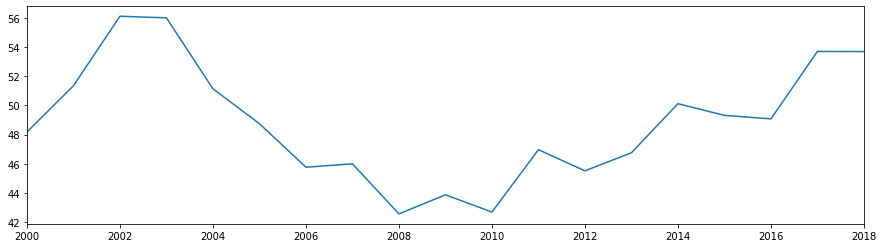

In [0]:
df_taxa_retorno = pd.Series(df_taxa_retorno, index = ano)
fig, ax = plt.subplots(figsize = (15,4))

ax = df_taxa_retorno.plot()

In [0]:
df_limpo = df.copy()
df_limpo.dropna(subset = ['roubo_bicicleta'], axis = 0, inplace = True)
df_limpo = df_limpo.drop(['mes'], axis = 1)
df_limpo = df_limpo.groupby(['vano']).sum()
df_limpo

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014,4942,41.0,152,584.0,6366,87561,5676.0,2080.0,46599.0,7742,1305,32651,5890,80461,7314,28,44.0,7758.0,100.0,1415.0,0.0,13287,157995,17683,35524,11144.0,15533.0,0.0,102456,182340,1.0,1807.0,168.0,34770.0,26933,12063.0,12428.0,2976.0,25227,34816.0,11189.0,20179.0,771.0,87399.0,6201.0,545,33.0,18.0,0.0,5719,95533,32651,818727.0,36
2015,4200,32.0,133,645.0,6009,77376,4887.0,1784.0,40371.0,6756,1188,31035,7225,65437,7805,27,33.0,12038.0,83.0,1418.0,118.0,14770,147933,16944,38348,10774.0,19187.0,1086.0,93506,179845,4.0,2028.0,133.0,35595.0,28089,12062.0,13961.0,2614.0,23663,36032.0,10364.0,20202.0,894.0,74932.0,6348.0,533,48.0,23.0,2.0,5010,85280,31035,777356.0,36
2016,5042,56.0,239,925.0,6055,70023,4705.0,1783.0,34950.0,7288,1318,41696,9874,93818,13731,24,51.0,19549.0,72.0,777.0,191.0,20392,208781,16759,29275,10252.0,17574.0,2013.0,93365,169238,12.0,1613.0,69.0,36912.0,25016,9959.0,13256.0,2264.0,28690,35745.0,10101.0,16331.0,1143.0,64848.0,5905.0,541,37.0,38.0,2.0,6262,127098,41696,806042.0,36
2017,5346,39.0,237,1127.0,6001,60555,4952.0,2112.0,26872.0,6600,1258,54366,10599,85993,15273,22,60.0,24380.0,56.0,690.0,146.0,30994,230437,15708,19163,7541.0,15627.0,1924.0,85327,145290,8.0,1457.0,111.0,29472.0,21312,7582.0,12173.0,1971.0,37630,33355.0,7545.0,16900.0,1667.0,51035.0,4631.0,377,25.0,31.0,4.0,6749,125646,54366,750607.0,36
2018,4950,56.0,174,1534.0,6242,63282,5310.0,1957.0,27520.0,6437,1249,52097,9182,88422,15660,21,58.0,26538.0,83.0,941.0,159.0,30759,231606,15794,20440,8316.0,15718.0,1901.0,81701,143870,4.0,1554.0,107.0,34493.0,21626,7963.0,12034.0,2026.0,36448,33548.0,6546.0,15780.0,2281.0,56009.0,4780.0,350,27.0,28.0,4.0,6714,130620,52097,770467.0,36
2019,2717,24.0,84,1249.0,3853,42335,3592.0,1239.0,18274.0,3556,804,28012,5277,55717,11136,13,24.0,18660.0,84.0,683.0,121.0,17385,141472,10812,14279,5411.0,12094.0,1563.0,61336,105495,0.0,1130.0,67.0,26178.0,15572,5950.0,8449.0,1486.0,19387,24179.0,4174.0,12938.0,2140.0,40592.0,3173.0,218,30.0,14.0,0.0,4074,85513,28012,535113.0,22


In [0]:
fig, ax = plt.subplots(figsize = (40,40))

ax = sns.heatmap(df_limpo.corr(), cmap = 'RdBu', fmt = '.2f', square = True, annot = True, ax = ax)

In [0]:
df_correlacao = df.corr()
df_correlacao.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,1.000000,-0.023117,-0.787954,-0.385409,-0.193495,0.348200,0.920857,0.680215,0.769110,-0.729137,-0.433973,0.431811,-0.499714,0.581047,0.744539,0.915297,0.662307,-0.760950,0.117213,0.474497,-0.674224,-0.820871,0.521959,0.552910,0.893201,-0.751390,0.742433,0.693570,0.270723,0.711752,0.868290,0.872604,-0.129442,0.243974,0.376463,0.872581,0.886567,0.704862,0.903709,0.175584,0.663975,0.900268,0.624874,0.687663,0.743666,0.350426,0.343317,-0.522162,-0.195109,-0.148525,-0.153724,-0.567238,0.919205,0.581047,0.927262,-0.130852
mes,-0.023117,1.000000,-0.147254,0.003349,-0.009709,-0.075428,-0.035351,0.008701,0.010458,0.121516,0.168331,-0.028679,-0.022314,-0.078892,0.039179,-0.009561,-0.020893,-0.025573,-0.074865,0.001910,-0.076748,0.070435,0.120360,-0.039157,-0.026548,-0.103046,-0.083042,0.098852,-0.027410,0.181863,-0.030385,-0.046434,0.081025,-0.010554,-0.010440,0.064716,0.001450,0.039618,-0.023439,-0.010464,-0.059361,-0.054906,-0.044200,0.088405,-0.014150,0.004649,0.012086,-0.149883,0.030635,0.008166,-0.017301,-0.182285,-0.010293,-0.078892,0.000653,-0.023246
hom_doloso,-0.787954,-0.147254,1.000000,0.314233,0.350517,0.106398,-0.638756,-0.588839,-0.659631,0.321079,0.044835,-0.265414,0.558434,-0.189194,-0.434588,-0.663233,-0.390277,0.696099,0.184476,-0.112002,0.569721,0.401451,-0.082710,-0.365401,-0.575451,0.705769,-0.654885,-0.716368,-0.392098,-0.056953,-0.723981,-0.724342,0.187881,-0.244552,-0.377134,-0.749668,-0.772473,-0.495734,-0.516782,-0.214379,-0.293159,-0.508627,-0.389846,-0.646223,-0.276441,-0.310522,-0.383326,0.562750,0.080894,0.331647,0.150768,0.915061,-0.641335,-0.189194,-0.599659,0.128602
lesao_corp_morte,-0.385409,0.003349,0.314233,1.000000,0.170049,-0.091644,-0.307632,-0.173575,-0.210696,0.295052,0.065603,0.001036,0.105967,0.029813,-0.157277,-0.317077,-0.032755,0.431367,0.036271,0.001231,0.142639,-0.017111,-0.016037,0.140164,-0.194489,0.199528,-0.342779,-0.173117,-0.044884,-0.010467,-0.414264,-0.422651,0.065535,-0.134063,-0.107151,-0.176270,-0.279759,-0.102866,-0.094734,-0.120628,-0.037255,-0.111363,-0.110078,-0.167410,0.007385,-0.370177,-0.112399,0.294070,-0.069337,0.082451,-0.031250,0.273637,-0.279171,0.029813,-0.407636,0.043765
latrocinio,-0.193495,-0.009709,0.350517,0.170049,1.000000,0.164594,-0.131669,-0.197945,-0.251415,-0.043662,-0.097794,0.078347,0.442688,0.197046,0.004083,-0.065896,0.034941,0.152434,0.208461,0.123474,0.060962,-0.053127,0.112848,-0.037291,0.004912,0.322337,-0.191608,-0.217338,-0.106732,0.098037,-0.139530,-0.147373,0.165112,-0.112790,-0.193640,-0.260260,-0.276498,-0.282605,-0.191288,-0.253775,0.102377,-0.185048,-0.161959,-0.323583,-0.112531,-0.208378,-0.152924,0.168348,-0.105659,0.148454,0.093182,0.428212,-0.038702,0.197046,-0.127273,0.100195


In [0]:
df_correlacao.loc[df_correlacao.vano >0.9]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,1.000000,-0.023117,-0.787954,-0.385409,-0.193495,0.348200,0.920857,0.680215,0.769110,-0.729137,-0.433973,0.431811,-0.499714,0.581047,0.744539,0.915297,0.662307,-0.760950,0.117213,0.474497,-0.674224,-0.820871,0.521959,0.552910,0.893201,-0.751390,0.742433,0.693570,0.270723,0.711752,0.868290,0.872604,-0.129442,0.243974,0.376463,0.872581,0.886567,0.704862,0.903709,0.175584,0.663975,0.900268,0.624874,0.687663,0.743666,0.350426,0.343317,-0.522162,-0.195109,-0.148525,-0.153724,-0.567238,0.919205,0.581047,0.927262,-0.130852
tentat_hom,0.920857,-0.035351,-0.638756,-0.307632,-0.131669,0.357950,1.000000,0.671085,0.570042,-0.696509,-0.403973,0.572488,-0.375707,0.628714,0.776077,0.865642,0.612824,-0.696145,0.135100,0.495100,-0.487043,-0.660998,-0.238071,0.584136,0.883370,-0.661101,0.702214,0.464884,0.039787,-0.229455,0.834291,0.822149,-0.066944,0.178720,0.312462,0.635349,0.865926,0.691042,0.770666,0.298646,0.705472,0.756630,0.633347,0.495790,0.496328,0.391149,0.412369,-0.384032,-0.083249,0.026047,-0.102727,-0.412764,0.877657,0.628714,0.841354,-0.065856
roubo_transeunte,0.915297,-0.009561,-0.663233,-0.317077,-0.065896,0.396065,0.865642,0.531092,0.570682,-0.613315,-0.374334,0.391719,-0.347796,0.560687,0.724581,1.000000,0.746160,-0.646446,0.287083,0.425449,-0.585793,-0.722735,0.176856,0.389181,0.902794,-0.576619,0.763219,0.704115,0.465886,0.340032,0.792901,0.855963,-0.122046,0.197488,0.286427,0.755212,0.752362,0.368128,0.534525,0.023909,0.583425,0.538589,0.313402,0.361285,0.567995,0.295703,0.296848,-0.569260,-0.238565,-0.105827,-0.049954,-0.450340,0.981271,0.560687,0.909226,-0.097355
trafico_drogas,0.903709,-0.023439,-0.516782,-0.094734,-0.191288,-0.076327,0.770666,-0.146277,0.658813,-0.725671,-0.209169,0.709150,-0.546309,0.458468,0.642756,0.534525,0.242317,-0.310884,-0.022068,0.526242,-0.523080,-0.689965,0.107098,0.451875,0.541923,-0.726047,0.144898,0.523132,-0.505747,0.012248,0.278765,0.121580,-0.124867,0.268554,0.332418,0.834802,0.970940,0.884679,1.000000,0.467136,0.449284,0.973440,0.853028,0.800282,0.520275,0.066798,0.344465,-0.496267,0.053091,0.106456,-0.176844,-0.443745,0.525879,0.458468,0.812310,-0.097018
apf,0.900268,-0.054906,-0.508627,-0.111363,-0.185048,-0.106754,0.756630,-0.080418,0.714162,-0.689235,-0.152797,0.720824,-0.526428,0.423132,0.573006,0.538589,0.211902,-0.296020,-0.027172,0.488781,-0.473546,-0.637730,0.045592,0.433294,0.519023,-0.733745,0.200357,0.569856,-0.478932,-0.006410,0.366084,0.198874,-0.118549,0.273123,0.369309,0.845391,0.940289,0.852069,0.973440,0.447204,0.406687,1.000000,0.864711,0.804133,0.518877,0.135321,0.366325,-0.523130,0.049591,0.077876,-0.140590,-0.449340,0.512521,0.423132,0.839761,-0.118372
indicador_roubo_rua,0.919205,-0.010293,-0.641335,-0.279171,-0.038702,0.506179,0.877657,0.503053,0.470757,-0.632215,-0.481275,0.436242,-0.347458,0.668151,0.800578,0.981271,0.820932,-0.648492,0.282835,0.638090,-0.517568,-0.741912,0.400517,0.516400,0.961061,-0.597449,0.668169,0.524267,0.311880,0.610235,0.773795,0.802526,-0.095814,0.130650,0.204880,0.684482,0.760436,0.314385,0.525879,-0.064303,0.684858,0.512521,0.211976,0.317307,0.715919,0.166162,0.161086,-0.522767,-0.210602,-0.010453,-0.061001,-0.391738